In [ ]:
import numpy
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn import metrics
from sklearn.model_selection import KFold

import math
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
# fix random seed for reproducibility
numpy.random.seed(7)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Importing the Train Data
import pandas as pd
df = pd.read_csv("E:\PD Dataset From Laptop/train_data.txt")
X_first = numpy.array(df)
X_train = numpy.delete(X_first, 27, 1)
X_withlabels = numpy.delete(X_train, 0,1)
print("X_with contains 26 input features and class label but not with patient id", X_withlabels.shape)
X = numpy.delete(X_withlabels, 26, 1)
print("X contains 26 input features only and there is no output label", X.shape)
Y = X_withlabels[: ,26]
print(Y)
print(X[[1039]])

X_with contains 26 input features and class label but not with patient id (1040, 27)
X contains 26 input features only and there is no output label (1040, 26)
[1. 1. 1. ... 0. 0. 0.]
[[1.809000e+00 1.485100e-04 6.800000e-01 8.430000e-01 2.040000e+00
  7.881000e+00 7.820000e-01 2.690000e+00 4.543000e+00 1.107300e+01
  8.069000e+00 9.255540e-01 9.748100e-02 1.347200e+01 1.192600e+02
  1.216300e+02 8.028000e+00 1.081440e+02 1.375460e+02 6.200000e+01
  6.000000e+01 8.211245e-03 5.658130e-04 1.818200e+01 1.000000e+00
  3.387000e+00]]


# Dataset Generation

In [ ]:
print("done")

# Regenerating the Best Results

In [ ]:
j = 1

i=1
indices = j
increment = 26+j
while i<=39:

    indices = numpy.append(indices, increment)    #Indices will hold all indices of ist three samples in each subject
    i = i+1
    increment = increment+26
print(indices.shape)         #Thus we get 40x3=120 indices of 120samples. Now extract those samples from X and Y to get a new Training Set
#print(indices)
X_train_withlabels = X_withlabels[[indices]]
print(X_train_withlabels.shape)
Y_New = X_train_withlabels[:, 26]
X_New = numpy.delete(X_train_withlabels, 26, 1)

print(X_New.shape)

(40,)
(40, 27)
(40, 26)


In [ ]:
X_FS = SelectKBest(f_classif, k=7).fit_transform(X_New, Y_New)
Best_Acc =0
print("Size of selected features ===================================", X_FS.shape)
########### LOSO ##############################

i = 0
cor_class=0
LOSO_Acc=0
while i<=39:
    X_test = X_FS[[i]]
    X_train = numpy.delete(X_FS, i, 0)
    Y_test = Y_New[[i]]
    Y_train = numpy.delete(Y_New, i, 0)
    ###############For Each Selected Features, evaluate model performance by trying different nodes############
    model =  MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 4), random_state=1)
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    if(i<=19):
        if predictions[0]==1:
            cor_class = cor_class+1
    if(i>19):
        if predictions[0]==0:
            cor_class = cor_class+1

    i = i+1
LOSO_Acc= (cor_class/40)*100
if (LOSO_Acc>Best_Acc):
    Best_Acc = LOSO_Acc
    print("Best Acc ====================================", Best_Acc)


Size of selected features =================================== (40, 7)
Best Acc ==================================== 90.0


# ROC of Proposed Method

In [ ]:
j = 1 #####Here select a specific value of j.
#while j<=2:
print("This is Dataset No=======================================================================", j)
i=1
indices = j
increment = 26+j
while i<=39:

    indices = numpy.append(indices, increment)    #Indices will hold all indices of ist three samples in each subject
    i = i+1
    increment = increment+26
print(indices.shape)         #Thus we get 40x3=120 indices of 120samples. Now extract those samples from X and Y to get a new Training Set
#print(indices)
X_train_withlabels = X_withlabels[[indices]]
print(X_train_withlabels.shape)
Y_New = X_train_withlabels[:, 26]
X_New = numpy.delete(X_train_withlabels, 26, 1)
print(indices)
print(X_New.shape)
print(Y_New.shape)
print(Y_New)

###########Above Code Generate a Specific Data for a specific Vowel#############


################# The Below Three Statements are much important bcoz if we do not use, Y or Y_test size is (4,) i.e.
# it is a column vector having no dimenstion. So we cannot use it with numpy.vstack(), as the above Y_test_total emptyp
#array might have some predefined dimension.
print(Y_New.shape)
Y_New=Y_New[:, numpy.newaxis] # It should be run once. We need to restart kernel. Boz if we rerun it, the shape will bcom (4, 1, 1)
print(Y_New.shape)
##################################

# The Below are to create empty arrays for ROC Chart
y_probas_total = numpy.empty((0,2), float)
Y_test_total = numpy.empty((0,1), int)

Best_Acc =0

X_FS = SelectKBest(f_classif, k=7).fit_transform(X_New, Y_New)
print("Size of Selected Features ============", X_FS.shape)

i = 0
cor_class=0
TP=0
TN=0
FP=0
FN=0
LOSO_Acc=0
while i<=39:
    X_test = X_FS[[i]]
    X_train = numpy.delete(X_FS, i, 0)
    Y_test = Y_New[[i]]
    Y_train = numpy.delete(Y_New, i, 0)
    ###############For Each Selected Features, evaluate model performance by trying different nodes############
    #model =  DecisionTreeClassifier()
    #model=LinearDiscriminantAnalysis()
    #model=GaussianNB()
    model =  MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 4), random_state=1)
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)

    ####################The Below Three Statements are about ROC Chart###################
    y_probas = model.predict_proba(X_test)
    y_probas_total =  numpy.vstack((y_probas_total, y_probas))
    Y_test_total =  numpy.vstack((Y_test_total, Y_test))
    ####################################################################################

    if(i<=19):
        if predictions==1:
            cor_class = cor_class+1
            TP = TP+1
    if(i>19):
        if predictions==0:
            cor_class = cor_class+1
            TN = TN+1

    i = i+1
LOSO_Acc= (cor_class/40)*100
Sen = TP/20
Spec = TN/20
FP = 20-TN
FN = 20-TP
if (LOSO_Acc>Best_Acc):
    Best_Acc = LOSO_Acc
    print("Best Acc ====================================", Best_Acc)
    print("Sen ==================================", Sen*100)
    print("Spec =================================", Spec*100)
print("Mathew Correlation Coefficients MCC=", (TP*TN-FP*FN)/(math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))))

This is Dataset No======================================================================= 1
(40,)
(40, 27)
[   1   27   53   79  105  131  157  183  209  235  261  287  313  339
  365  391  417  443  469  495  521  547  573  599  625  651  677  703
  729  755  781  807  833  859  885  911  937  963  989 1015]
(40, 26)
(40,)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(40,)
(40, 1)
Size of Selected Features ============ (40, 7)
Best Acc ==================================== 90.0
Sen ================================== 95.0
Spec ================================= 85.0
Mathew Correlation Coefficients MCC= 0.8040302522073697


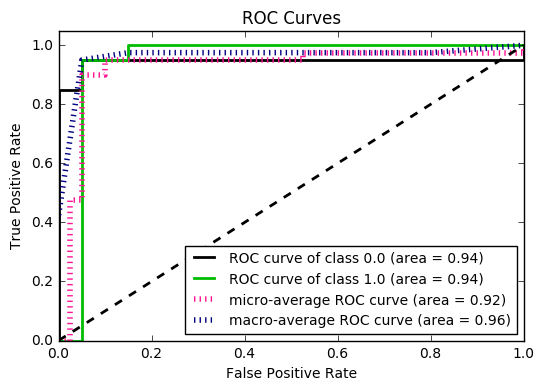

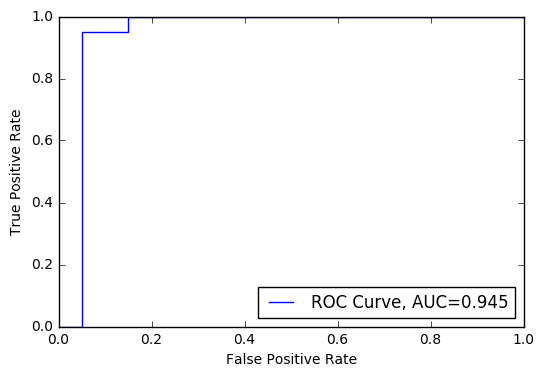

In [ ]:
##############ROC############################3333
from sklearn import metrics
import scikitplot as skplt
import matplotlib.pyplot as plt
####################Below Two Lines are to Plot ROC using scikitplot library###############
skplt.metrics.plot_roc_curve(Y_test_total, y_probas_total)
plt.show()
################################################################################3

####################Below Piece of Code for ROC using Sklearn###########################3
fpr, tpr, _ = metrics.roc_curve(Y_test_total,  y_probas_total[::,1])
auc = metrics.roc_auc_score(Y_test_total, y_probas_total[::,1])
plt.plot(fpr,tpr,label="ROC Curve, AUC="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

# ROC of Conv DNN

In [ ]:
j = 1 #####Here select a specific value of j.
#while j<=2:
print("This is Dataset No=======================================================================", j)
i=1
indices = j
increment = 26+j
while i<=39:

    indices = numpy.append(indices, increment)    #Indices will hold all indices of ist three samples in each subject
    i = i+1
    increment = increment+26
print(indices.shape)         #Thus we get 40x3=120 indices of 120samples. Now extract those samples from X and Y to get a new Training Set
#print(indices)
X_train_withlabels = X_withlabels[[indices]]
print(X_train_withlabels.shape)
Y_New = X_train_withlabels[:, 26]
X_New = numpy.delete(X_train_withlabels, 26, 1)
print(indices)
print(X_New.shape)
print(Y_New.shape)
print(Y_New)

###########Above Code Generate a Specific Data for a specific Vowel#############


################# The Below Three Statements are much important bcoz if we do not use, Y or Y_test size is (4,) i.e.
# it is a column vector having no dimenstion. So we cannot use it with numpy.vstack(), as the above Y_test_total emptyp
#array might have some predefined dimension.
print(Y_New.shape)
Y_New=Y_New[:, numpy.newaxis] # It should be run once. We need to restart kernel. Boz if we rerun it, the shape will bcom (4, 1, 1)
print(Y_New.shape)
##################################

# The Below are to create empty arrays for ROC Chart
y_probas_total = numpy.empty((0,2), float)
Y_test_total = numpy.empty((0,1), int)

Best_Acc =0


i = 0
cor_class=0
TP=0
TN=0
FP=0
FN=0
LOSO_Acc=0
while i<=39:
    X_test = X_New[[i]]
    X_train = numpy.delete(X_New, i, 0)
    Y_test = Y_New[[i]]
    Y_train = numpy.delete(Y_New, i, 0)
    ###############For Each Selected Features, evaluate model performance by trying different nodes############
    #model =  DecisionTreeClassifier()
    #model=LinearDiscriminantAnalysis()
    #model=GaussianNB()
    model =  MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(8, 3), random_state=1)
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)

    ####################The Below Three Statements are about ROC Chart###################
    y_probas = model.predict_proba(X_test)
    y_probas_total =  numpy.vstack((y_probas_total, y_probas))
    Y_test_total =  numpy.vstack((Y_test_total, Y_test))
    ####################################################################################

    if(i<=19):
        if predictions==1:
            cor_class = cor_class+1
            TP = TP+1
    if(i>19):
        if predictions==0:
            cor_class = cor_class+1
            TN = TN+1

    i = i+1
LOSO_Acc= (cor_class/40)*100
Sen = TP/20
Spec = TN/20
FP = 20-TN
FN = 20-TP
if (LOSO_Acc>Best_Acc):
    Best_Acc = LOSO_Acc
    print("Best Acc ====================================", Best_Acc)
    print("Sen ==================================", Sen*100)
    print("Spec =================================", Spec*100)
print("Mathew Correlation Coefficients MCC=", (TP*TN-FP*FN)/(math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))))

This is Dataset No======================================================================= 1
(40,)
(40, 27)
[   1   27   53   79  105  131  157  183  209  235  261  287  313  339
  365  391  417  443  469  495  521  547  573  599  625  651  677  703
  729  755  781  807  833  859  885  911  937  963  989 1015]
(40, 26)
(40,)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(40,)
(40, 1)
Best Acc ==================================== 80.0
Sen ================================== 65.0
Spec ================================= 95.0
Mathew Correlation Coefficients MCC= 0.628970902033151


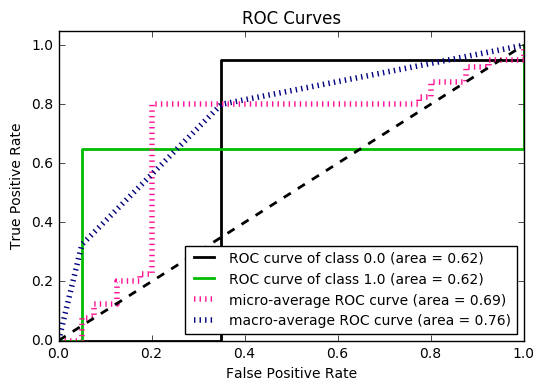

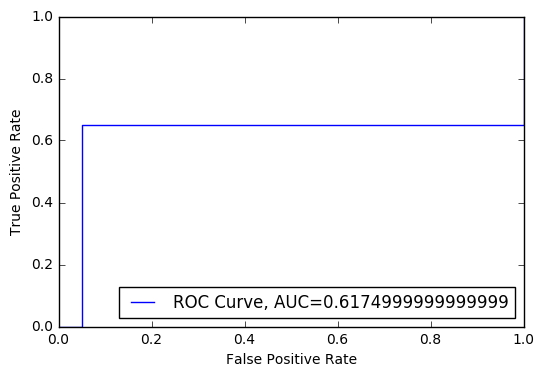

In [ ]:
##############ROC############################3333
from sklearn import metrics
import scikitplot as skplt
import matplotlib.pyplot as plt
####################Below Two Lines are to Plot ROC using scikitplot library###############
skplt.metrics.plot_roc_curve(Y_test_total, y_probas_total)
plt.show()
################################################################################3

####################Below Piece of Code for ROC using Sklearn###########################3
fpr, tpr, _ = metrics.roc_curve(Y_test_total,  y_probas_total[::,1])
auc = metrics.roc_auc_score(Y_test_total, y_probas_total[::,1])
plt.plot(fpr,tpr,label="ROC Curve, AUC="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()